In [60]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import RandomizedLasso,LassoLarsCV
from sklearn.exceptions import ConvergenceWarning 
from sklearn.model_selection import train_test_split
from sklearn.metrics import make_scorer, accuracy_score, confusion_matrix
import sklearn.datasets 

%matplotlib inline

''' To Ignore Warning'''
import warnings
warnings.filterwarnings('ignore')

In [2]:
# подключение dataset
data = pd.read_csv('/Users/aleksandr/Dropbox/BIG DATA/1. Что такое большие данные/abalone-dataset/abalone.csv') 

In [4]:
# посмотр колличестао строк и столбцов в файле
data.shape

(4177, 9)

In [5]:
# Название столбцов в файле
data.columns

Index(['Sex', 'Length', 'Diameter', 'Height', 'Whole weight', 'Shucked weight',
       'Viscera weight', 'Shell weight', 'Rings'],
      dtype='object')

In [6]:
# чтение содержания
data.head()

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


In [7]:
# общая информация по файлу: количество, средняя, минимальная и т.д.
data.describe()

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
count,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000
mean,0.523992,0.407881,0.139516,0.828742,0.359367,0.180594,0.238831,9.933684
std,0.120093,0.099240,0.041827,0.490389,0.221963,0.109614,0.139203,3.224169
min,0.075000,0.055000,0.000000,0.002000,0.001000,0.000500,0.001500,1.000000
25%,0.450000,0.350000,0.115000,0.441500,0.186000,0.093500,0.130000,8.000000
50%,0.545000,0.425000,0.140000,0.799500,0.336000,0.171000,0.234000,9.000000
75%,0.615000,0.480000,0.165000,1.153000,0.502000,0.253000,0.329000,11.000000
max,0.815000,0.650000,1.130000,2.825500,1.488000,0.760000,1.005000,29.000000


In [8]:
# просмотр файла: на типы данных, количество записей, пробелы в данных.
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4177 entries, 0 to 4176
Data columns (total 9 columns):
Sex               4177 non-null object
Length            4177 non-null float64
Diameter          4177 non-null float64
Height            4177 non-null float64
Whole weight      4177 non-null float64
Shucked weight    4177 non-null float64
Viscera weight    4177 non-null float64
Shell weight      4177 non-null float64
Rings             4177 non-null int64
dtypes: float64(7), int64(1), object(1)
memory usage: 293.8+ KB


In [12]:
# Возвращает подмножество столбцов DataFrame на основе dtypes столбца. т.е. выведи из data с типом данных number (числовой) и
# обьект в виде columns

# DataFrame.select_dtypes(include=None, exclude=None) - параметры пример из /
# https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.select_dtypes.html

# List of Numerical Features
nf = data.select_dtypes(include=[np.number]).columns

# List of Categorical Features
cf = data.select_dtypes(include=[np.object]).columns

print(nf)
print(cf)

Index(['Length', 'Diameter', 'Height', 'Whole weight', 'Shucked weight',
       'Viscera weight', 'Shell weight', 'Rings'],
      dtype='object')
Index(['Sex'], dtype='object')


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x12161e4e0>,
      dtype=object)

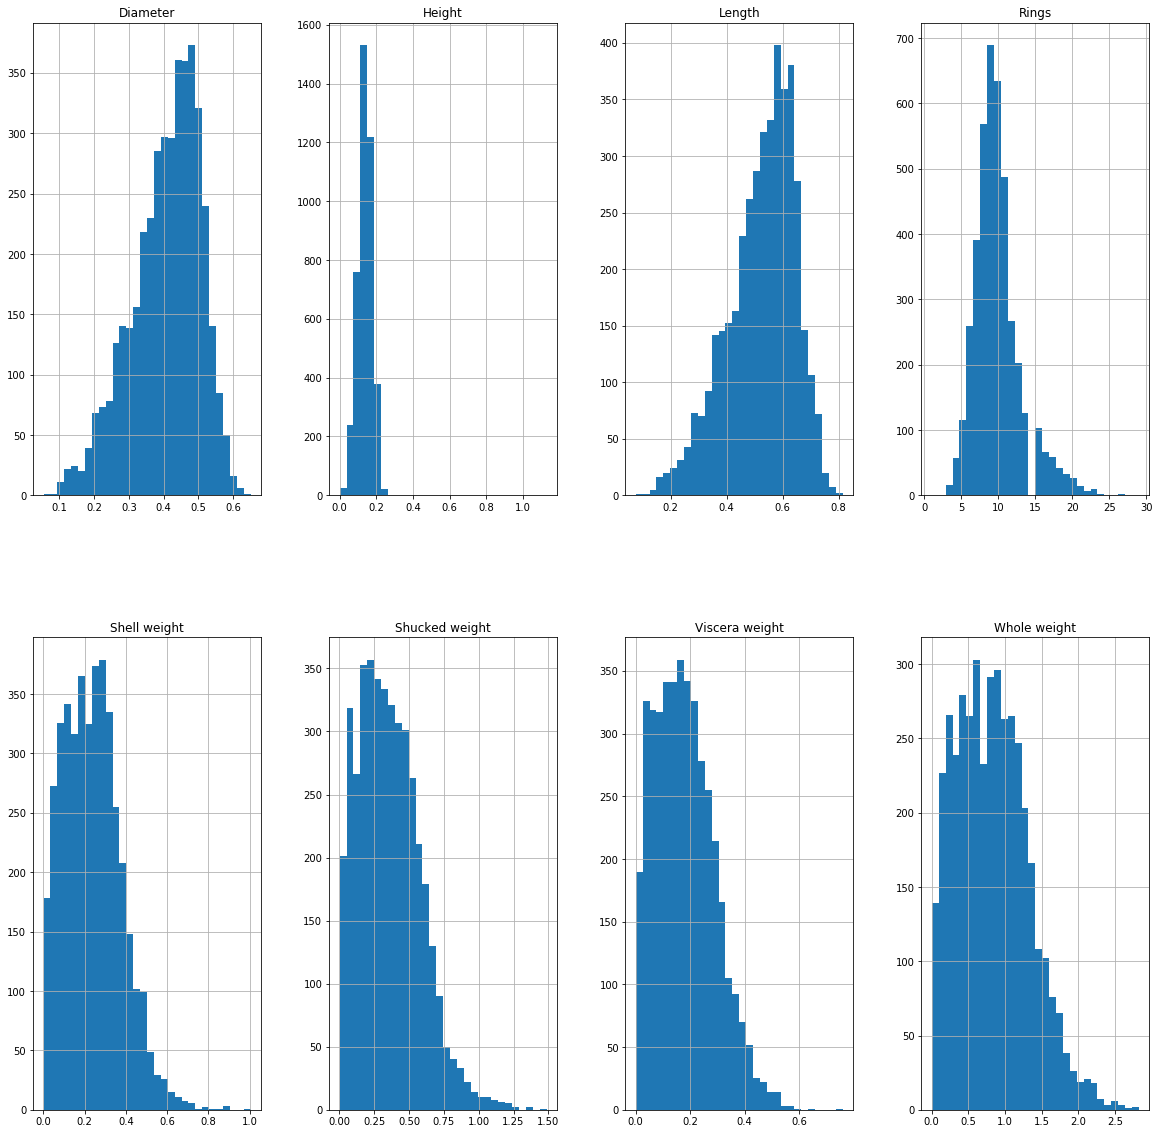

In [15]:
# Из документации доступные параметры DataFrame.hist(column=None, by=None, grid=True, xlabelsize=None, xrot=None, ylabelsize=None, yrot=None, ax=None, sharex=False, sharey=False, figsize=None, layout=None, bins=10, **kwds)
# https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.hist.html

# Гистограмма: чтобы увидеть числовое распределение данных
data.hist(figsize=(20,20), grid = True, layout = (2,4), bins = 30)

In [16]:
# Target Column Analysis (Анализ целевой колонки Rings)

print("Value Count of Rings Column")
print(data.Rings.value_counts())
print("\nPercentage of Rings Column")
print(data.Rings.value_counts(normalize = True))

Value Count of Rings Column
9     689
10    634
8     568
11    487
7     391
12    267
6     259
13    203
14    126
5     115
15    103
16     67
17     58
4      57
18     42
19     32
20     26
3      15
21     14
23      9
22      6
24      2
27      2
1       1
25      1
2       1
26      1
29      1
Name: Rings, dtype: int64

Percentage of Rings Column
9     0.164951
10    0.151784
8     0.135983
11    0.116591
7     0.093608
12    0.063921
6     0.062006
13    0.048599
14    0.030165
5     0.027532
15    0.024659
16    0.016040
17    0.013886
4     0.013646
18    0.010055
19    0.007661
20    0.006225
3     0.003591
21    0.003352
23    0.002155
22    0.001436
24    0.000479
27    0.000479
1     0.000239
25    0.000239
2     0.000239
26    0.000239
29    0.000239
Name: Rings, dtype: float64


In [19]:
# Уникальные значения Rings

print(len(data.Rings.unique()))

28


### Visualization

In [20]:
# Sex Count of Abalone, M - Male, F - Female, I - Infant
# M - Муж
# F - Жен
# I - Ребенок (младенец, дети)

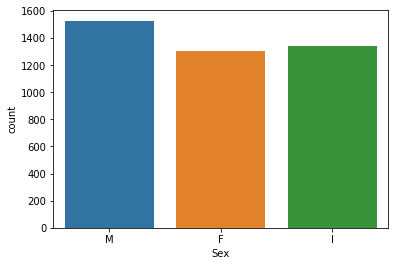

In [28]:
# Выведем распределиние типа описанного вида, для более простого восприятия данных
sns.countplot(x='Sex', data = data)

In [29]:
# Посмотрим соотношение полов

print("\nSex Count in Percentage")
print(data.Sex.value_counts(normalize = True))
print("\nSex Count in Numbers")
print(data.Sex.value_counts())


Sex Count in Percentage
M    0.365813
I    0.321283
F    0.312904
Name: Sex, dtype: float64

Sex Count in Numbers
M    1528
I    1342
F    1307
Name: Sex, dtype: int64


In [31]:
# Извлечение возраста из столбца Rings, Age = Ring + 1,5
# смотрим первые 5 записей (индексация с 0)

data['Age'] = data['Rings'] + 1.5
data['Age'].head(5)

0    16.5
1     8.5
2    10.5
3    11.5
4     8.5
Name: Age, dtype: float64

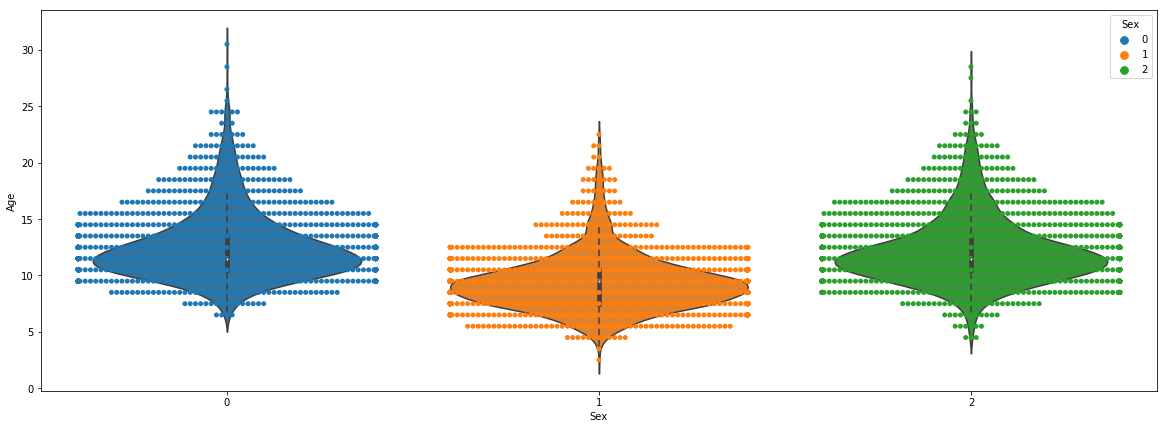

In [65]:
# Визуализация пола и возроста при помощи библиотеки matplotlib

plt.figure(figsize = (20,7))
sns.swarmplot(x = 'Sex', y = 'Age', data = data, hue = 'Sex')
sns.violinplot(x = 'Sex', y = 'Age', data = data)

In [33]:
# Согласно приведенному выше графику
# Мужчины: большинство от 7,5 до 19
# Женщины: большинство от 8 до 19
# Младенец: большинство от 6 до < 10

In [37]:
# Сделаем группировку по Полу (Sex) Вывидем ['Length', 'Diameter', 'Height', 'Whole weight', 'Shucked weight','Viscera weight', 'Shell weight', 'Age']
# .mean() - Вычислить среднее арифметическое по указанной оси (https://docs.scipy.org/doc/numpy/reference/generated/numpy.mean.html)
# .sort_values - сортировка по значению Возраст (Age), порядок от большего к меньшему (ascending = False) (https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.sort_values.html)
 
data.groupby('Sex')[['Length', 'Diameter', 'Height', 'Whole weight', 
                   'Shucked weight','Viscera weight', 'Shell weight', 'Age']
                   ].mean().sort_values(by = 'Age',ascending = False)

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Age
Sex,,,,,,,,
F,0.579093,0.454732,0.158011,1.046532,0.446188,0.230689,0.302010,12.629304
M,0.561391,0.439287,0.151381,0.991459,0.432946,0.215545,0.281969,12.205497
I,0.427746,0.326494,0.107996,0.431363,0.191035,0.092010,0.128182,9.390462


In [43]:
# Предварительная обработка данных для модели
'''LabelEnconding the Categorical Data'''
data['Sex'] = LabelEncoder().fit_transform(data['Sex'].tolist())

In [64]:
'''One Hot Encoding for Sex Feature '''
transformed_sex_feature = OneHotEncoder().fit_transform(data['Sex'].values.reshape(-1,1)).toarray()
df_sex_encoded = pd.DataFrame(transformed_sex_feature, columns = ["Sex_"+str(int(i)) 
                                                                  for i in range(transformed_sex_feature.shape[1])])

df = pd.concat([data, df_sex_encoded], axis=1)

In [48]:
df.head()

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings,Age,Sex_0,Sex_1,Sex_2
0,2,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15,16.5,0.0,0.0,1.0
1,2,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7,8.5,0.0,0.0,1.0
2,0,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9,10.5,1.0,0.0,0.0
3,2,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10,11.5,0.0,0.0,1.0
4,1,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7,8.5,0.0,1.0,0.0


In [49]:
# Разделение данных для модели
# Особенности обучения
# Функция прогнозирования
# Train & Test Split

'''Learning Features and Predicting Features'''
Xtrain = df.drop(['Rings','Age','Sex'], axis = 1)
Ytrain = df['Rings']

In [50]:
'''Train Test Split , 70:30 Ratio'''
X_train, X_test, Y_train, Y_test = train_test_split(Xtrain, Ytrain, test_size=0.33, random_state=42)

In [63]:
'''Creating Object of LogisticRegression'''
logreg = LogisticRegression()

'''Learning from Training Set'''
logreg.fit(X_train, Y_train)

'''Predicting for Training Set'''
Y_pred = logreg.predict(X_test)

'''Accuracy Score'''
result_acc = accuracy_score(Y_test,Y_pred) 

In [52]:
'''For Both, LabelEncoding and OneHotEncoding -> The accuracy is 25 %'''
result_acc

0.25525743292240755

In [53]:
# Simple Logistic Regression Model
# No of Classes : 2
# 1 - Rings > 10
# 0 - Rings <= 10

In [54]:
'''Creating New Target Variable '''
df['newRings'] = np.where(df['Rings'] > 10,1,0)

In [55]:
'''Learning Features and Predicting Features'''
Xtrain = df.drop(['newRings','Rings','Age','Sex'], axis = 1)
Ytrain = df['newRings']

In [56]:
'''Train Test Split , 70:30 Ratio'''
X_train, X_test, Y_train, Y_test = train_test_split(Xtrain, Ytrain, test_size=0.33, random_state=42)

In [61]:
'''Creating Object of LogisticRegression'''
logreg = LogisticRegression()

'''Learning from Training Set'''
logreg.fit(X_train, Y_train)

'''Predicting for Training Set'''
Y_pred = logreg.predict(X_test)

'''Accuracy Score'''
result_acc = accuracy_score(Y_test,Y_pred) 

In [62]:
result_acc

0.7722987672226251

In [ ]:
pass